# I. Analysis of the data

In [1]:
# Import of all the modules needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import of the data set
sales = pd.read_csv("vgsales.csv")
sales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


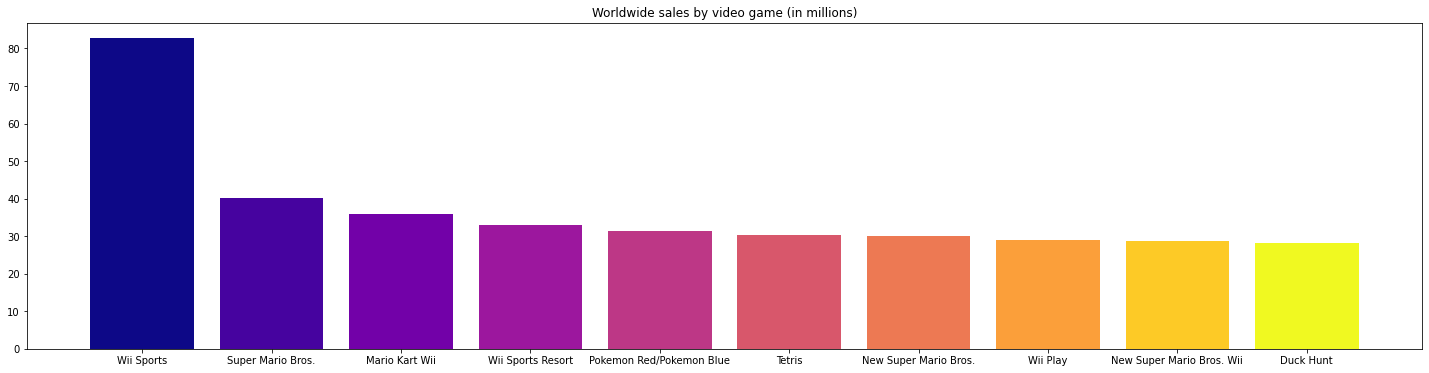

In [3]:
# Number of sales of the top 10 best-selling games of the 1980-2020 period
nb_vg = 10
my_cmap = plt.get_cmap("plasma")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

plt.figure(figsize=(25, 6))
plt.bar(np.arange(nb_vg),sales.iloc[:nb_vg,-1], color = my_cmap(rescale(np.arange(nb_vg))))
plt.xticks(np.arange(nb_vg), sales.iloc[:nb_vg,1])
plt.title('Worldwide sales by video game (in millions)')

plt.show()

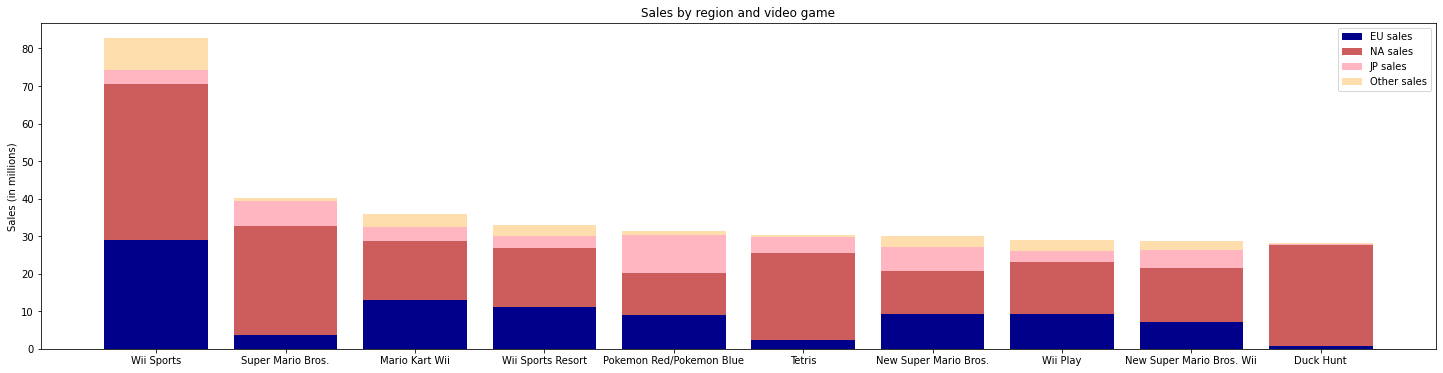

In [4]:
# Number of sales of the top 10 best-selling games by region
labels = sales.iloc[:nb_vg,1]
eu_sales = sales.iloc[:nb_vg,7]
na_sales = sales.iloc[:nb_vg,6]
jp_sales = sales.iloc[:nb_vg,8]
other_sales = sales.iloc[:nb_vg,9]

fig, ax = plt.subplots(figsize=(25, 6))
ax.bar(labels, eu_sales, label = 'EU sales', color = 'darkblue')
ax.bar(labels, na_sales, bottom=eu_sales, label='NA sales', color = 'indianred')
ax.bar(labels, jp_sales, bottom=eu_sales+na_sales, label='JP sales', color = 'lightpink')
ax.bar(labels, other_sales, bottom=eu_sales+na_sales+jp_sales, label='Other sales', color = 'navajowhite')

ax.set_ylabel('Sales (in millions)')
ax.legend()
ax.set_title('Sales by region and video game')

plt.show()

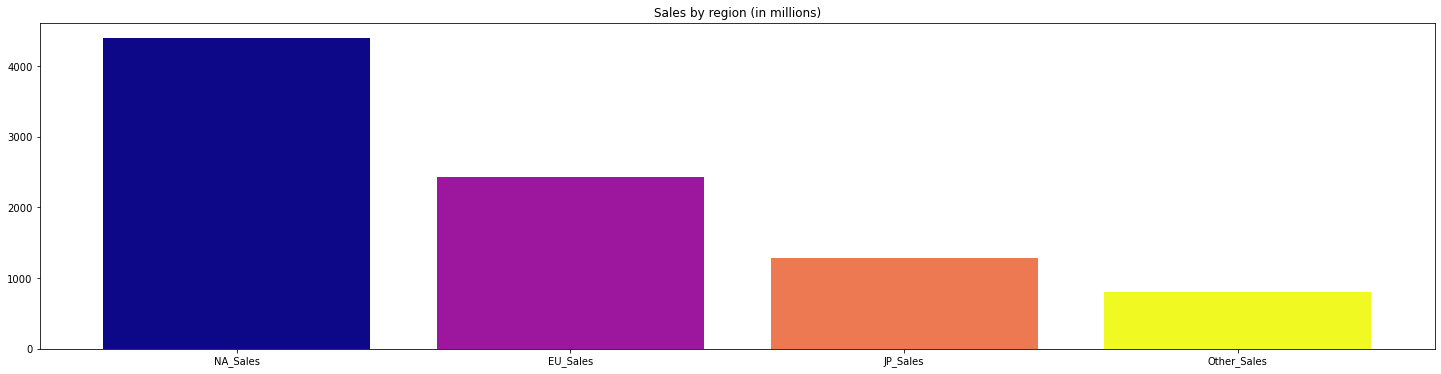

In [5]:
#Number of sales by region
plt.figure(figsize=(25, 6))
plt.bar(np.arange(4),sales.iloc[:,6:10].aggregate(sum), color = my_cmap(rescale(np.arange(4))))
plt.xticks(np.arange(4), sales.columns[6:10])
plt.title('Sales by region (in millions)')

plt.show()

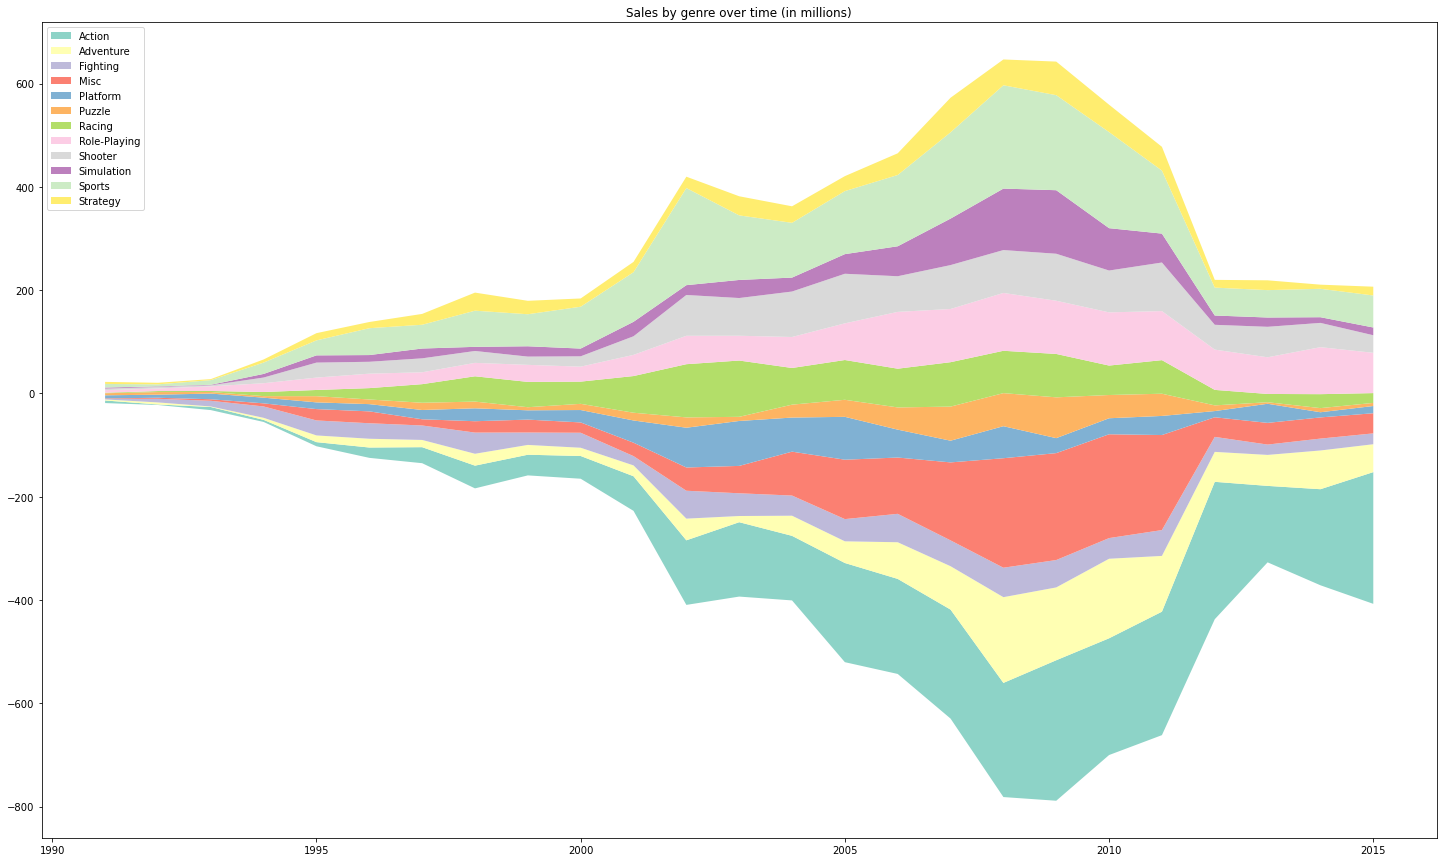

In [6]:
#Number of sales by genre over time
salesByYearGenre = sales.groupby(['Year','Genre']).count().iloc[:,0].unstack()
x = salesByYearGenre.index.values
y = salesByYearGenre.T
my_cmap = plt.get_cmap("Set3")

plt.figure(figsize=(25, 15))
plt.stackplot(x,y,baseline="wiggle",labels = salesByYearGenre.columns ,colors = my_cmap(rescale(np.arange(12))))
plt.legend(loc='upper left')
plt.title('Sales by genre over time (in millions)')

plt.show()

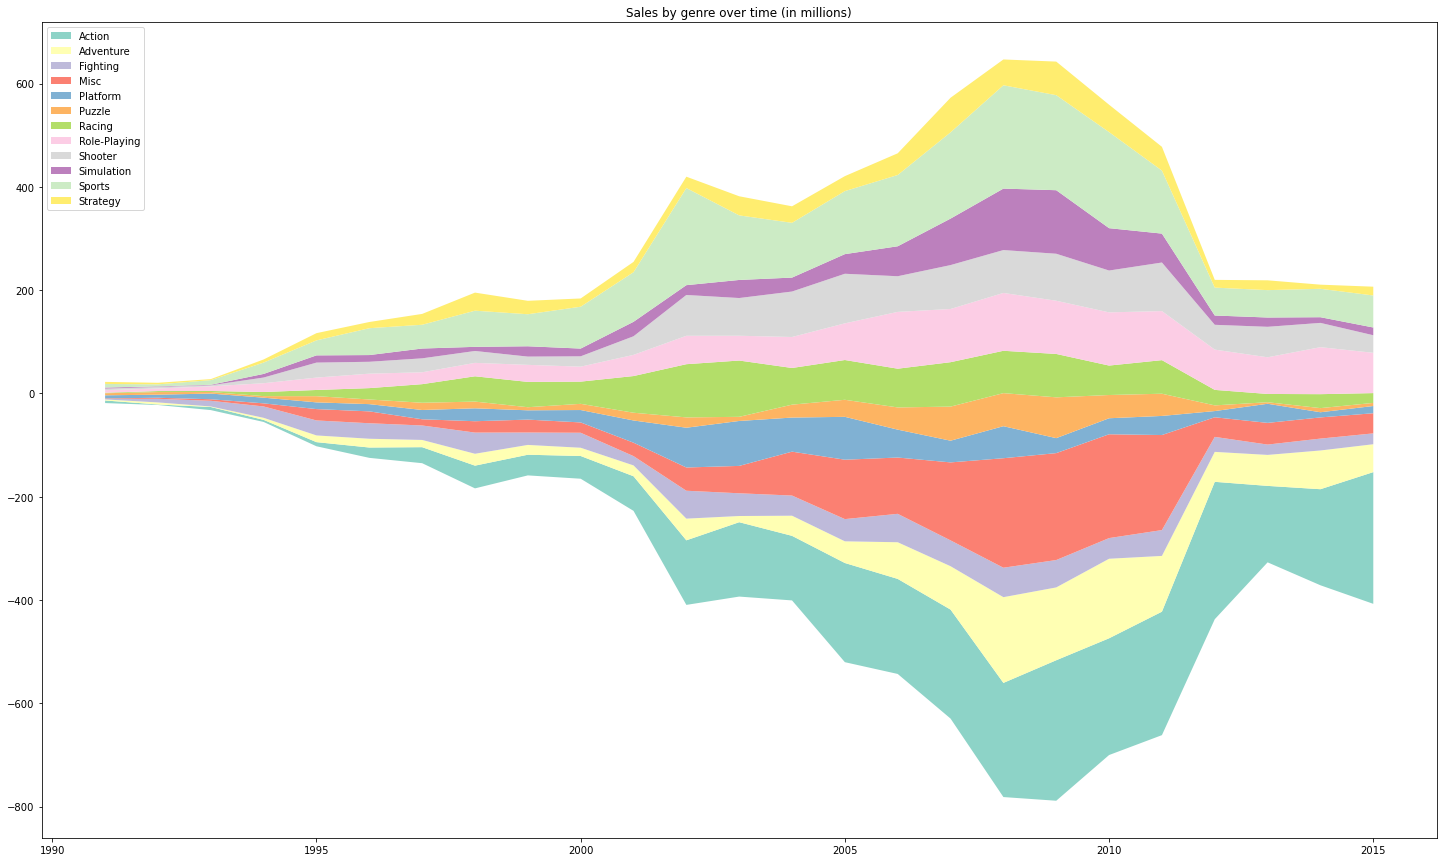

In [7]:
# I remove the years with na values
na_values = salesByYearGenre.isna().sum(axis=1)
salesByYearGenre = salesByYearGenre[na_values == 0]
x = salesByYearGenre.index.values
y = salesByYearGenre.T

plt.figure(figsize=(25, 15))
plt.stackplot(x,y,baseline="wiggle",labels = salesByYearGenre.columns ,colors = my_cmap(rescale(np.arange(12))))
plt.legend(loc='upper left')
plt.title('Sales by genre over time (in millions)')

plt.show()

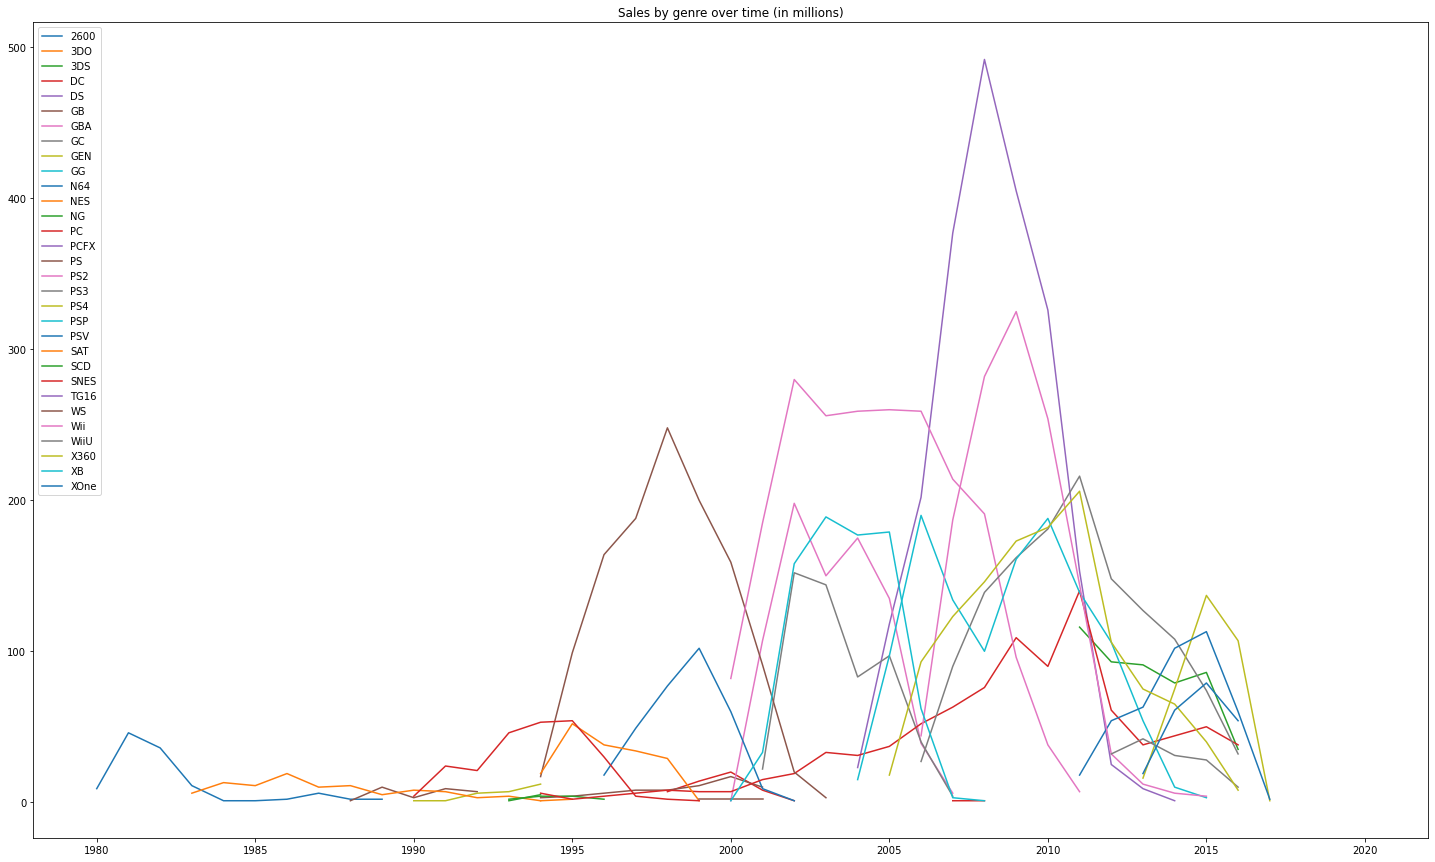

In [10]:
salesByYearPlat = sales.groupby(['Year','Platform']).count().iloc[:,0].unstack()

plt.figure(figsize=(25, 15))
plt.plot(salesByYearPlat)
plt.legend(salesByYearPlat.columns, loc='upper left')
plt.title('Sales by genre over time (in millions)')

plt.show()